# ABOUT THE DATA  AND THE PROBELM

The data given in the problem is regarding a bank's customer churn, i.e. The customer will leave the bank or stay.
There are several types of information collected namely –

Loan ID, Gender, Marital Status, Dependants, Education Status, Self-
* RowNumber—corresponds to the record (row) number and has no effect on the output.
* CustomerId—contains random values and has no effect on customer leaving the bank.
* Surname—the surname of a customer has no impact on their decision to leave the bank.
* CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* Geography—a customer’s location can affect their decision to leave the bank.
* Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
* Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
* Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
* NumOfProducts—refers to the number of products that a customer has purchased through the bank.
* HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
* IsActiveMember—active customers are less likely to leave the bank.
* EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* Exited—whether or not the customer left the bank.

On the basis of several information collected under these heads, the bank will decide that particular customer will be provided staying with the bank or not and will help to implement this in the banking system sucessfully.

We have tried to find out the best model which is fairly accurate in predicting weather Loan for a particular Loan Application will be Approved or not.

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math as m
import statsmodels.formula.api as sfa
import statsmodels.api as sma
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
le= LabelEncoder()
mmax= MinMaxScaler()
ohe = OneHotEncoder()
sc= StandardScaler()
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import ElasticNet,Lasso,Ridge,LinearRegression,SGDRegressor
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
from sklearn.model_selection import KFold, cross_val_score

In [82]:
df= pd.read_csv(r"D:\Jupyter Notebook\datasets\Banking Datasets\Churn Modeling.csv")

In [83]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [84]:
df=df.drop('RowNumber',axis=1)

In [85]:
df=df.drop('CustomerId',axis=1)

In [86]:
df.Surname.drop

<bound method Series.drop of 0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object>

In [87]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [89]:
df.shape

(10000, 12)

In [90]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [91]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# UNIVARIATE ANALYSIS

In [92]:
df.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [93]:
catcols= ['Geography', 'Gender']

In [94]:
numcols= ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']

<Axes: xlabel='Geography', ylabel='count'>

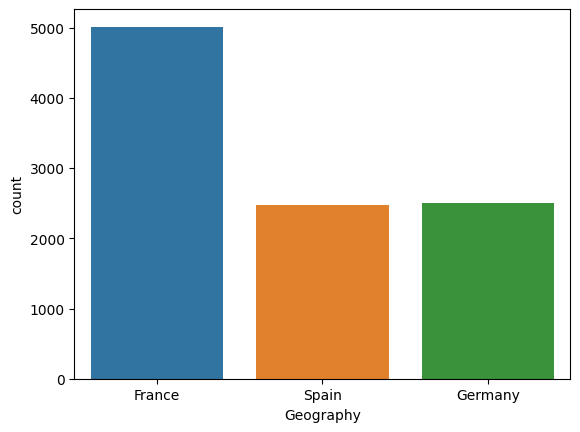

In [95]:
sns.countplot(data=df,x='Geography')

<Axes: xlabel='Gender', ylabel='count'>

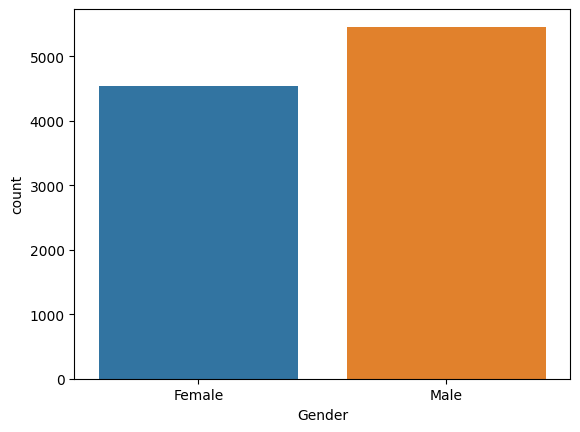

In [96]:
sns.countplot(data=df,x='Gender')

# Country wise customer segmentation

* France has the highest number of customers for this particular data followed by Spain and Germany.
* There are more male Customers as compared to Females.

In [97]:
numcols= ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']

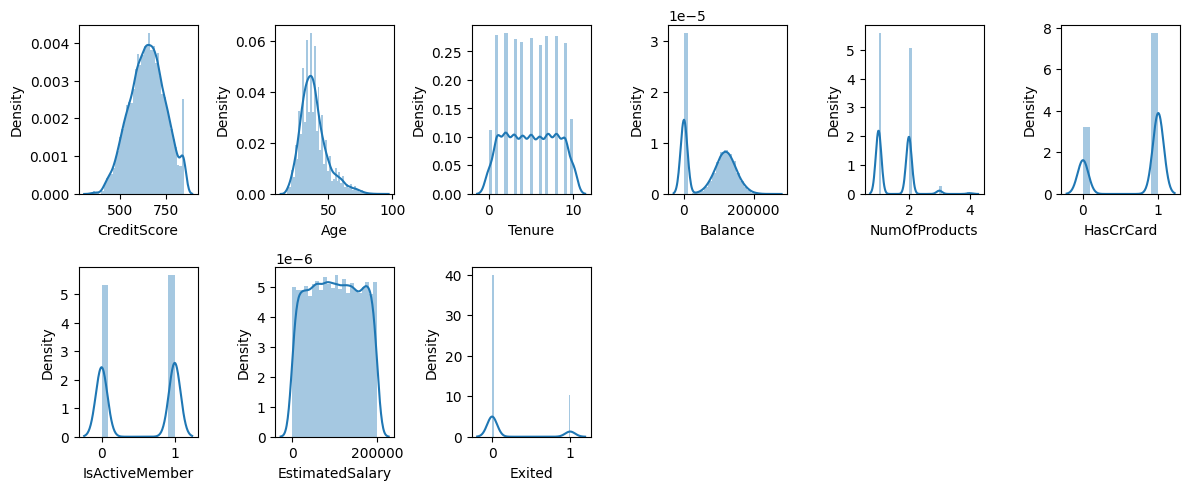

In [98]:
nrows=3
ncols=6
rep=1

plt.figure(figsize=(12,7))
for i in numcols:
    plt.subplot(nrows,ncols,rep)
    sns.distplot(df.loc[:,i])
    rep+=1

plt.tight_layout()
plt.show()

In [99]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


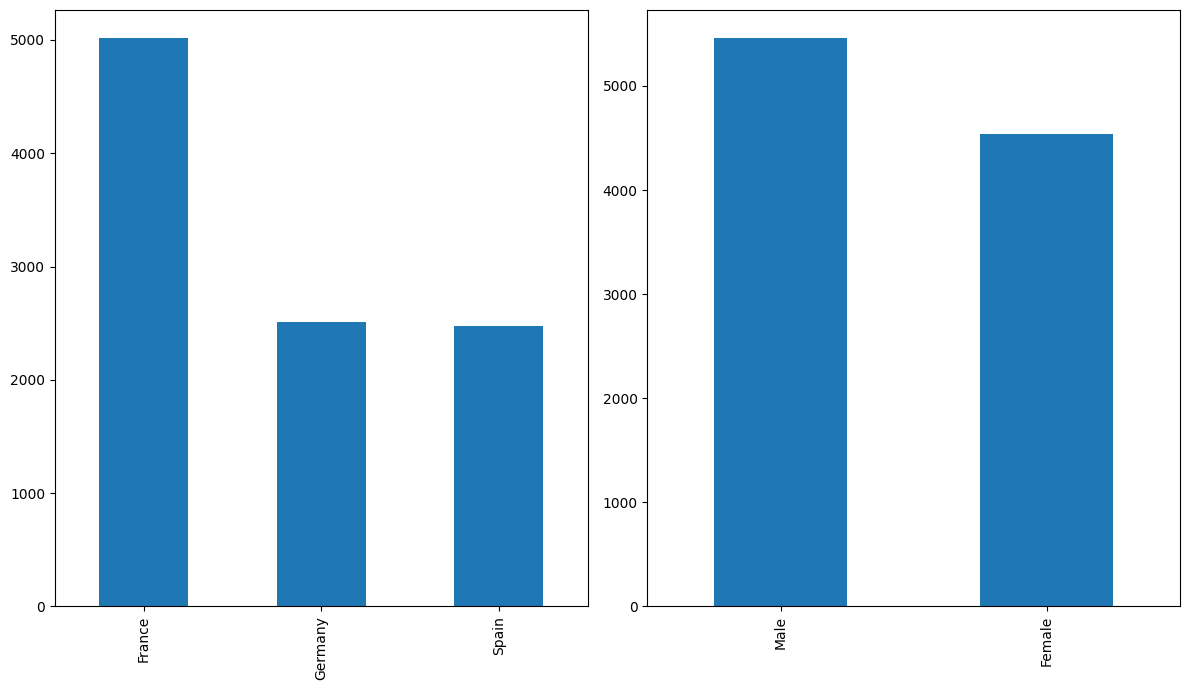

In [100]:
nrows=1
ncols=2
rep=1

plt.figure(figsize=(12,7))
for i in catcols:
    plt.subplot(nrows,ncols,rep)
    df.loc[:,i].value_counts().plot(kind='bar') 
    rep+=1

plt.tight_layout()
plt.show()

In [101]:
total_c = df.Surname.value_counts().sum()

In [102]:
lost=(df.Exited==1).sum()

In [103]:
total_c

10000

In [104]:
churn = (total_c/lost)*100
print(churn)

490.9180166912126


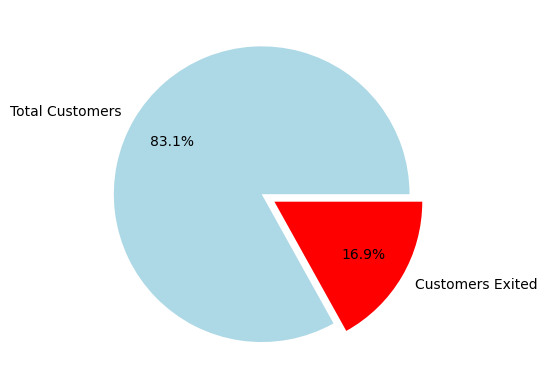

In [105]:
labels = ['Total Customers', 'Customers Exited']
sizes= [total_c,lost]

plt.pie(sizes,labels=labels,colors=['lightblue','red'],pctdistance=0.7,autopct='%1.1f%%',explode=(0,0.1))
plt.show()

* The bank has lost around 16.9 % of customers from the total Churn.
* This accounts for 490 customers out of 10000 customers.

In [106]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [107]:
df1 = df.drop('Surname',axis=1)

In [108]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [109]:
def hour(i):
    if i=='France':
        return 0
    elif i=='Germany':
        return 1
    else:
        return 2

In [110]:
df1.Geography = df1.Geography.apply(hour)

In [111]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,1,Male,42,3,75075.31,2,1,0,92888.52,1


In [112]:
def gender(i):
    if i=='Male':
        return 0
    if i=='Female':
        return 1

In [113]:
df1.Gender = df1.Gender.apply(gender)

In [114]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,1,0,42,3,75075.31,2,1,0,92888.52,1


In [115]:
df1.std()

CreditScore           96.653299
Geography              0.827529
Gender                 0.497932
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

In [116]:
cols= ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [117]:
df2=sc.fit_transform(df1.loc[:,cols])

In [118]:
df2 = pd.DataFrame(data=df2,columns=cols)

In [119]:
df2['Exited'] = df1.Exited

In [120]:
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,-0.901886,1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1
1,-0.440036,1.515067,1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0
2,-1.536794,-0.901886,1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1
3,0.501521,-0.901886,1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0
4,2.063884,1.515067,1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.901886,-0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0
9996,-1.391939,-0.901886,-0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0
9997,0.604988,-0.901886,1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1
9998,1.256835,0.306591,-0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1


In [121]:
df2.std()

CreditScore        1.000050
Geography          1.000050
Gender             1.000050
Age                1.000050
Tenure             1.000050
Balance            1.000050
NumOfProducts      1.000050
HasCrCard          1.000050
IsActiveMember     1.000050
EstimatedSalary    1.000050
Exited             0.402769
dtype: float64

In [122]:
# CHECKING THE CORRELATION BETWEEN THE VARIABLES

<Axes: >

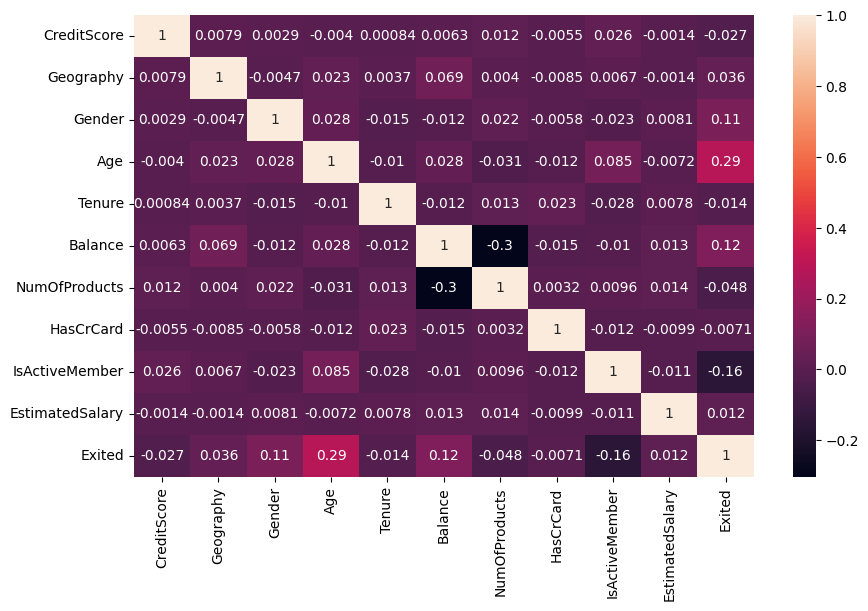

In [123]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(),annot=True)

# MODEL BUILDING

In [124]:
X= df2.drop('Exited',axis=1)
y= df2.Exited


xtrain,xtest,ytrain,ytest= train_test_split(X,y,test_size=0.30,random_state=42)
xtrain_c = sma.add_constant(xtrain)
xtest_c= sma.add_constant(xtest)

In [125]:
m1=sma.Logit(ytrain,xtrain_c).fit()

Optimization terminated successfully.
         Current function value: 0.440248
         Iterations 6


In [126]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6989
Method:                           MLE   Df Model:                           10
Date:                Tue, 19 Dec 2023   Pseudo R-squ.:                  0.1380
Time:                        13:09:35   Log-Likelihood:                -3081.7
converged:                       True   LL-Null:                       -3575.0
Covariance Type:            nonrobust   LLR p-value:                1.425e-205
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.5981      0.036    -44.395      0.000      -1.669      -1.528
CreditScore        -0.0723      0.032     -2.261      0.024      -0.135      -0.010
Geography           0.0904      0.032      2.797      0.005       0.027       0.154
Gender              0.2704      0.032      8.477      0.000       0.208       0.333
Age                 0.7489      0.032     23.651      0.000       0.687       0.811
Tenure             -0.0580      0.032     -1.817      0.069      -0.121       0.005
Balance             0.3095      0.034      9.093      0.000       0.243       0.376
NumOfProducts      -0.0116      0.032     -0.361      0.718      -0.075       0.051
HasCrCard          -0.0244      0.032     -0.769      0.442      -0.086       0.038
IsActiveMember     -0.5258      0.034    -15.553      0.000      -0.592      -0.460
EstimatedSalary     0.0060      0.032      0.187      0.852      -0.057       0.069
===================================================================================
"""

In [127]:
ypred_m1 = m1.predict(xtest_c)

In [128]:
ypred_prob = [0 if i<=0.5 else 1 for i in ypred_m1]

In [129]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,precision_score

In [130]:
def allmat1(model,test,predd):
    accuracy = accuracy_score(test,predd)
    precision= precision_score(test,predd)
    f1= f1_score(test,predd)
    recall= recall_score(test,predd)
    
    print('Accuracy:',accuracy,
         'Precision:',precision,
         'F1 Score:',f1,
         'recall:',recall)

In [131]:
allmat1(model=m1,test=ytest,predd=ypred_prob)

Accuracy: 0.8173333333333334 Precision: 0.6058823529411764 F1 Score: 0.27320954907161804 recall: 0.17636986301369864


In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
lr = LogisticRegression()

In [134]:
m2 = lr.fit(xtrain,ytrain)

In [135]:
ypred_m2 = m2.predict(xtest)

In [136]:
ypred_m2_prob = m2.predict_proba(xtest)

In [137]:
allmat1(model=m2,test=ytest,predd=ypred_m2)

Accuracy: 0.8166666666666667 Precision: 0.6011904761904762 F1 Score: 0.26861702127659576 recall: 0.17294520547945205


In [138]:
def allmat2(model,test,predd,estimator,X):
    accuracy = accuracy_score(test,predd)
    precision= precision_score(test,predd)
    f1= f1_score(test,predd)
    recall= recall_score(test,predd)
    cross_validation = cross_val_score(estimator=estimator,X=X,y=test)
    
    print('Accuracy:',accuracy,
         'Precision:',precision,
         'F1 Score:',f1,
         'recall:',recall,
         'cross validation:',cross_validation.mean())

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [140]:
rfc = RandomForestClassifier(criterion='entropy',n_estimators = 100, max_depth = 15, random_state = 750,min_samples_split=6)

In [141]:
m3 = rfc.fit(xtrain,ytrain)

In [142]:
ypred_m3 = m3.predict(xtest)

In [143]:
ypred_m3_prob = m3.predict_proba(xtest)

In [144]:
ypred_m3_aj = m3.predict_proba(xtest)[:,1]

In [145]:
allmat2(model=m3,test=ytest,predd=ypred_m3,estimator=m3,X=xtest)

Accuracy: 0.8713333333333333 Precision: 0.7981927710843374 F1 Score: 0.5786026200873362 recall: 0.4537671232876712 cross validation: 0.8550000000000001


* Here We can see that even after using Random forest we aren't able to get the desired results for f1 score and recall.
* Low f1 score 57% indicates that the model is unable to balance b/w precision and recall 45% that means the model is not good in identifying true positive cases leading to high number of false negatives.
* This means that the model m3 is not a good model for predictions.

In [146]:
df2.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

* As we can see that we have an imbalanced target class i.e class 0 is significantly larger than class 1 . 
* This will never let our machine train a good model and even the parameter tuning will not be of any good to help machine make good predictions.
* We will use SMOTE in this case so that we can balance both the classes as it will impute synthetic datapoints in the class which is weaker and help us to train better.

In [147]:
from imblearn.over_sampling import SMOTE

In [148]:
smote = SMOTE(random_state=5,n_jobs=100)

In [149]:
x_resamp,y_resamp = smote.fit_resample(X, y)

In [150]:
print(x_resamp.shape)
print(y_resamp.shape)

(15926, 10)
(15926,)


In [151]:
m4 = rfc.fit(x_resamp,y_resamp)

In [152]:
ypred_m4 = m4.predict(xtest)

In [153]:
ypred_m4_prob = m4.predict_proba(xtest)

In [154]:
allmat2(model=m4,test=ytest,predd=ypred_m4,estimator=m4,X=xtest)

Accuracy: 0.948 Precision: 0.8462783171521036 F1 Score: 0.8702163061564061 recall: 0.8955479452054794 cross validation: 0.8550000000000001


In [157]:
from sklearn.ensemble import GradientBoostingClassifier

In [162]:
gbc= GradientBoostingClassifier(learning_rate=0.5)

In [163]:
m5 = gbc.fit(x_resamp,y_resamp)

In [164]:
ypred_m5 = m5.predict(xtest)

In [165]:
allmat2(model=m5,test=ytest,predd=ypred_m5,estimator=m5,X=xtest)

Accuracy: 0.8913333333333333 Precision: 0.758 F1 Score: 0.6992619926199262 recall: 0.648972602739726 cross validation: 0.8433333333333334


In [166]:
from sklearn.ensemble import AdaBoostClassifier

In [167]:
abc = AdaBoostClassifier()

In [168]:
m6 = abc.fit(x_resamp,y_resamp)

In [169]:
ypred_m6 = m5.predict(xtest)

In [170]:
allmat2(model=m6,test=ytest,predd=ypred_m6,estimator=m6,X=xtest)

Accuracy: 0.8913333333333333 Precision: 0.758 F1 Score: 0.6992619926199262 recall: 0.648972602739726 cross validation: 0.8606666666666667


In [ ]:
# We can see that the best fitting model for the following problem is m4 i.e Random Forest Classifier.

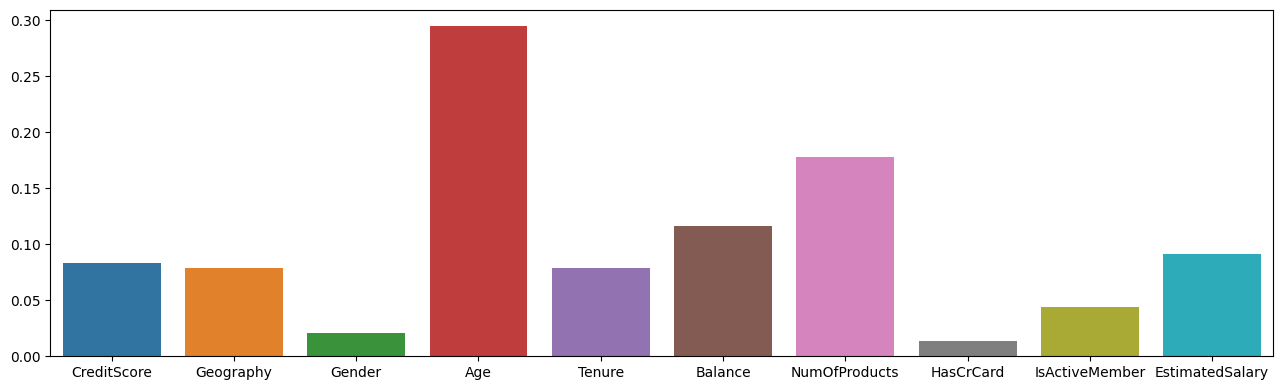

In [155]:
plt.figure(figsize=(13,4))
sns.barplot(x=m4.feature_names_in_,y= m4.feature_importances_)
plt.tight_layout()
plt.show()

* According to the model number 4 in the above graph we can see the importance of the various features that are in the data influencing the constant or dependent variable which is Loan Status.

* According to the model 4 applicant income it's the top 5 most important variable in determining that the loan for a particular application will be approved or not are- Age, NumOfProducts,Balance, EstimatedSalary and Tenure.

* According to the predictions,Age is a strong factor in influencing the customer churn, as customers at different ages have different motivations to either switch their banking from one bank to the other.

* Also, Number of Products is an important variable in predicting that the customer will be associated with the bank or not. Higher the number of features higher is the possibility that the customer will be retained with a bank or vice versa.

* Balance according to the modern 3 is the 3rd highest scoring variable. But, in real life scenario their is no relation b/w Balance and customer retention. However Customers with higher account balance are most likely to be High priority customers for any bank and it would like to retain its high networth clients.